<a href="https://colab.research.google.com/github/guilhermelaviola/BIArchitectureAndBigData/blob/main/Class11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **BI Analysis**



In [2]:
# Importing all the necessary libraries:
import json
from urllib.request import urlopen
import requests
import matplotlib.pyplot as plt
import pandas as pd
from google.cloud import storage
from io import StringIO

In [4]:
# Importing the dataset from parsed URL:
api_key = 'irtzpwJmKEKLvuT80bKLqIgJfXZBUps0'
stock_symbol = 'AMER3.SA'

url = f'https://financialmodelingprep.com/api/v3/profile/{stock_symbol}?apikey={api_key}'

def get_jsonparsed_data(url):
  response = urlopen(url)
  data = response.read().decode('utf-8')
  return json.loads(data)

get_jsonparsed_data(url)

[{'symbol': 'AMER3.SA',
  'price': 6.07,
  'beta': 0.288,
  'volAvg': 2427171,
  'mktCap': 1215480631,
  'lastDiv': 0,
  'range': '3.07-88',
  'changes': 0.51,
  'companyName': 'Americanas S.A.',
  'currency': 'BRL',
  'cik': None,
  'isin': 'BRAMERACNOR6',
  'cusip': None,
  'exchange': 'São Paulo',
  'exchangeShortName': 'SAO',
  'industry': 'Specialty Retail',
  'website': 'https://ri.americanas.com',
  'description': "Americanas S.A. operates in the e-commerce business in Brazil. It connects people, businesses, products, and services on the digital platform to offer various digital solutions. The company operates Americanas.com, an online store with various products in approximately 40 categories; Submarino, a digital brand in books, games, technology, and entertainment; Shoptime, a home shopping channel that offers bed, table, bath, small appliances, housewares, and sports and leisure products; Sou Barato, an outlet that offers repackaged products; Lojas Americanas; Americanas Exp

In [7]:
# Getting historical data of the stocks from a specified period of time:
def get_historical_data(symbol, api_key, start_date, end_date):
  url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start_date}&to={end_date}&apikey={api_key}'
  response = requests.get(url)
  data = response.json()
  return data

# Defining the time periods for analysis:
start_date_2023 = '2023-01-01'
end_date_2023 = '2023-12-31'
start_date_2024 = '2024-01-01'
end_date_2024 = '2024-12-31'

# Getting the historical data:
historical_data_2023 = get_historical_data(stock_symbol, api_key, start_date_2023, end_date_2023)
historical_data_2024 = get_historical_data(stock_symbol, api_key, start_date_2024, end_date_2024)

In [8]:
# Converting the data into a DataFrame for analysis:
df_2023 = pd.DataFrame(historical_data_2023['historical'])
df_2024 = pd.DataFrame(historical_data_2024['historical'])

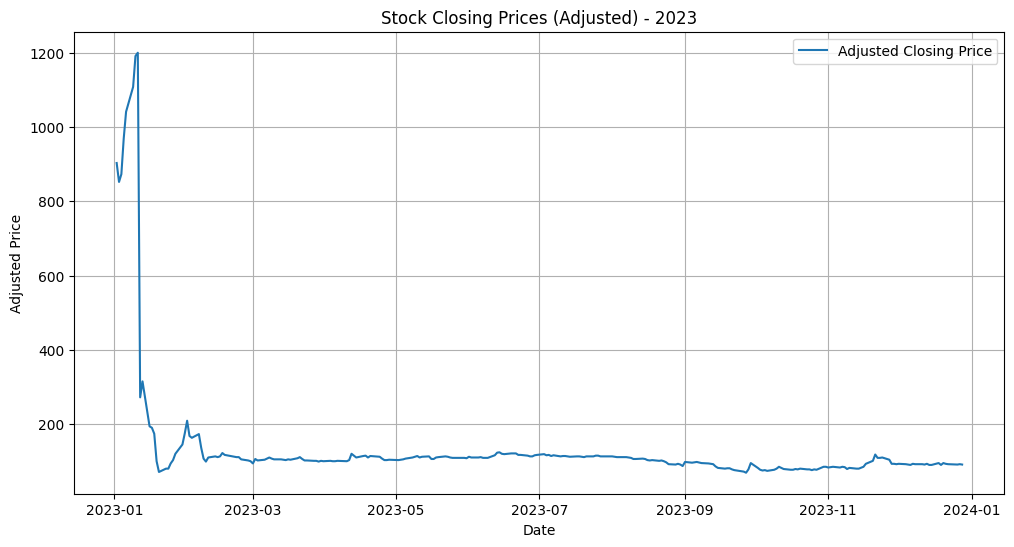

In [14]:
# Converting the column 'date' into a datetime and making it an index:
df_2023['date'] = pd.to_datetime(df_2023['date'])

# Plotting the adjusted closing prices:
plt.figure(figsize=(12, 6))
plt.plot(df_2023['date'], df_2023['adjClose'], label='Adjusted Closing Price')
plt.title('Stock Closing Prices (Adjusted) - 2023')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
df_2024

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2024-12-30,4.93,7.94,4.93,6.20,6.20,9595200,9595200,1.27,25.76,6.0000,"December 30, 24",0.2576
1,2024-12-27,5.25,5.51,4.78,5.15,5.15,4725100,4725100,-0.10,-1.90,5.1725,"December 27, 24",-0.0190
2,2024-12-26,6.00,6.05,5.20,5.20,5.20,2848800,2848800,-0.80,-13.33,5.6125,"December 26, 24",-0.1333
3,2024-12-23,6.63,6.65,5.93,5.96,5.96,1732600,1732600,-0.67,-10.11,6.2925,"December 23, 24",-0.1011
4,2024-12-20,6.63,6.85,6.48,6.63,6.63,1959700,1959700,0.00,0.00,6.6475,"December 20, 24",0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2024-01-08,88.00,89.00,85.00,87.00,87.00,333508,333508,-1.00,-1.14,87.2500,"January 08, 24",-0.0114
247,2024-01-05,88.00,91.00,87.00,87.00,87.00,246116,246116,-1.00,-1.14,88.2500,"January 05, 24",-0.0114
248,2024-01-04,90.00,90.00,88.00,88.00,88.00,128747,128747,-2.00,-2.22,89.0000,"January 04, 24",-0.0222
249,2024-01-03,90.00,91.00,87.00,90.00,90.00,227477,227477,0.00,0.00,89.5000,"January 03, 24",0.0000


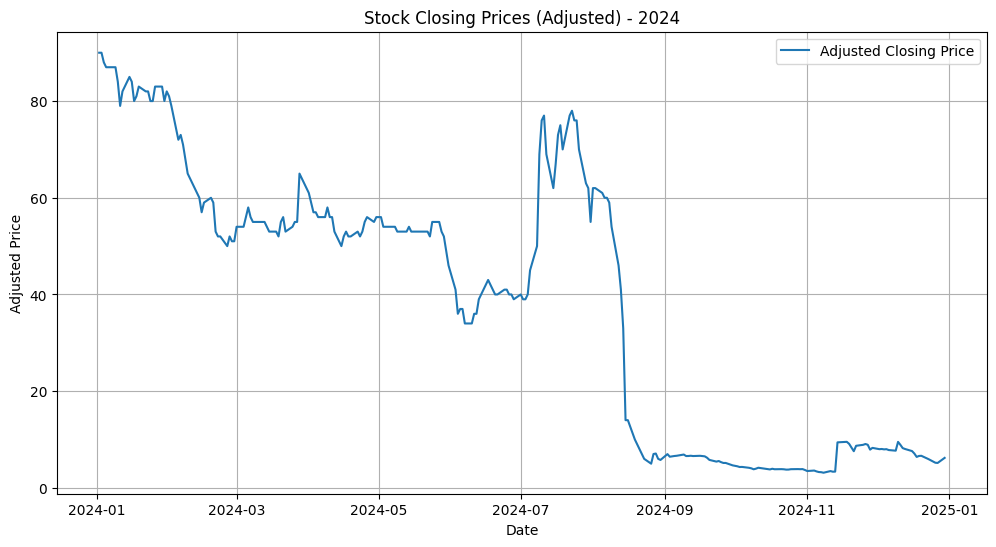

In [16]:
# Converting the column 'date' into a datetime and making it an index:
df_2024['date'] = pd.to_datetime(df_2024['date'])

# Plotting the adjusted closing prices:
plt.figure(figsize=(12, 6))
plt.plot(df_2024['date'], df_2024['adjClose'], label='Adjusted Closing Price')
plt.title('Stock Closing Prices (Adjusted) - 2024')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Getting historical data of the stocks from a specified period of time:
def get_data(metrics,symbol, annual, api_key):
  url = f'https://financialmodelingprep.com/api/v3/{metrics}/{symbol}?period={annual}&apikey={api_key}'
  response = requests.get(url)
  data = response.json()
  return data

metrics_cash = get_data('cash-flow-statement-growth', stock_symbol,'2024', api_key)
metrics_cash

[{'date': '2023-12-31',
  'symbol': 'AMER3.SA',
  'calendarYear': '2023',
  'period': 'FY',
  'growthNetIncome': 0.8240333568316958,
  'growthDepreciationAndAmortization': -0.14564884053230928,
  'growthDeferredIncomeTax': 1,
  'growthStockBasedCompensation': -1,
  'growthChangeInWorkingCapital': 0.1834448480065317,
  'growthAccountsReceivables': 0.6453232284150361,
  'growthInventory': -0.16744705720150113,
  'growthAccountsPayables': 1,
  'growthOtherWorkingCapital': -1.7829161966657663,
  'growthOtherNonCashItems': -1.9453292501021335,
  'growthNetCashProvidedByOperatingActivites': 0.9605321172714838,
  'growthInvestmentsInPropertyPlantAndEquipment': 0.9576477036335779,
  'growthAcquisitionsNet': -1,
  'growthPurchasesOfInvestments': 1,
  'growthSalesMaturitiesOfInvestments': -1,
  'growthOtherInvestingActivites': 0.6165942030084424,
  'growthNetCashUsedForInvestingActivites': 4.045562357966893,
  'growthDebtRepayment': 0.3312541135148186,
  'growthCommonStockIssued': -1,
  'growthC

In [19]:
df  = pd.DataFrame(metrics_cash)
df

,date,symbol,calendarYear,period,growthNetIncome,growthDepreciationAndAmortization,growthDeferredIncomeTax,growthStockBasedCompensation,growthChangeInWorkingCapital,growthAccountsReceivables,...,growthDividendsPaid,growthOtherFinancingActivites,growthNetCashUsedProvidedByFinancingActivities,growthEffectOfForexChangesOnCash,growthNetChangeInCash,growthCashAtEndOfPeriod,growthCashAtBeginningOfPeriod,growthOperatingCashFlow,growthCapitalExpenditure,growthFreeCashFlow
0,2023-12-31,AMER3.SA,2023,FY,0.824033,-0.145649,1.000000,-1.000000,0.183445,0.645323,...,1,-1.001248,-1.228345,0,-3.839283,-0.290319,-0.056035,0.960532,0.957648,0.959827
1,2022-12-31,AMER3.SA,2022,FY,-24.743392,0.236828,0.205586,0.014901,2.161487,1.366559,...,0,191.830506,1.945041,0,0.962064,-0.084865,-0.604154,-6.518424,-0.346523,-2.546663
2,2021-12-31,AMER3.SA,2021,FY,3.695283,1.160804,-2.752867,0.958441,-4.741728,-4.253688,...,0,1.093190,-2.311329,0,-2.267524,-0.591985,0.876315,-12.366938,-1.800194,-2.898904
3,2020-12-31,AMER3.SA,2020,FY,0.366015,0.151250,0.729555,-0.027373,-4.033228,-0.758013,...,0,-0.279090,1.598292,0,6.450795,0.876315,0.133290,-1.391090,-0.201410,-1.083589
4,2019-12-31,AMER3.SA,2019,FY,0.200234,0.201196,0.234267,0.347064,-0.785940,-4.010603,...,0,0.000000,2.615230,0,-0.748033,0.133290,1.123136,-0.633694,-0.165987,-6.569712


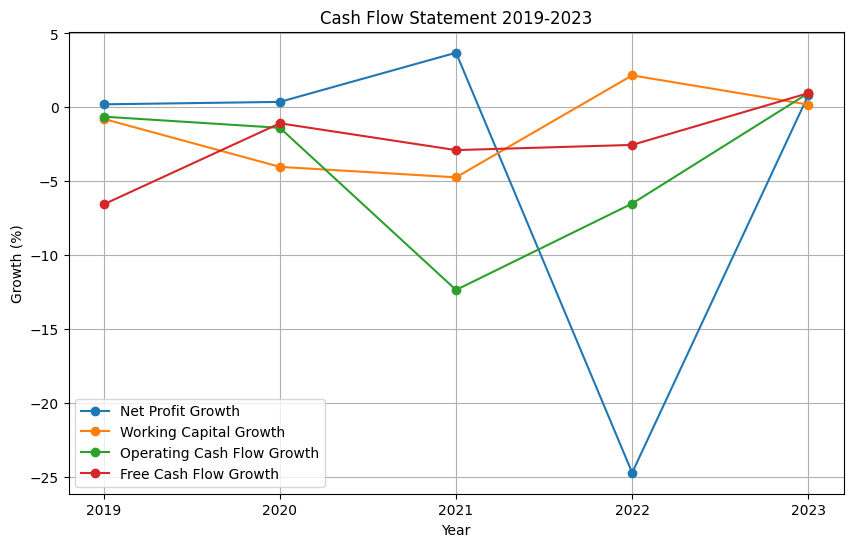

In [21]:
# Plotting the trend analysis:
plt.figure(figsize=(10, 6))

df['calendarYear'] = df['calendarYear'].astype(int)

years = df['calendarYear'].unique()

plt.plot(df['calendarYear'],df['growthNetIncome'], label='Net Profit Growth', marker='o')
plt.plot(df['calendarYear'],df['growthChangeInWorkingCapital'], label='Working Capital Growth', marker='o')
plt.plot(df['calendarYear'],df['growthOperatingCashFlow'], label='Operating Cash Flow Growth', marker='o')
plt.plot(df['calendarYear'],df['growthFreeCashFlow'], label='Free Cash Flow Growth', marker='o')

plt.title('Cash Flow Statement 2019-2023')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.xticks(years)
plt.legend()

plt.grid(True)
plt.show()

In [23]:
# Selecting the desired columns:
columns_to_save = ['calendarYear', 'growthNetIncome', 'growthChangeInWorkingCapital', 'growthOperatingCashFlow', 'growthFreeCashFlow']

df_statement = df[columns_to_save]
df_statement.to_csv(f'demostrantivo-fluxo-caixa-{stock_symbol}.csv', index=False)

df_2023.to_csv(f'acoes-precos-{stock_symbol}.csv', index=False)

In [ ]:
# Uploading a file into the bucket:
def upload_blob(project_id, bucket_name, source_file_name, destination_blob_name):
  storage_client = storage.Client(project=project_id)
  bucket = storage_client.bucket(bucket_name)
  blob = bucket.blob(destination_blob_name)
  blob.upload_from_filename(source_file_name)

  print(f'File {source_file_name} upado {destination_blob_name}.')

  upload_blob('spheric-verve-405817', 'datalakedescomplica', f'demostrantivo-fluxo-caixa-{stock_symbol}.csv', 'Dados/'+f'demostrantivo-fluxo-caixa-{stock_symbol}.csv')